In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas_profiling import ProfileReport

In [8]:
df=pd.read_excel("/Users/juank/Desktop/python/Ualet/Base_vinculados_Corregida.xlsx", sheet_name="Base")
df=df.assign(cant=lambda x:1)
df

,Fecha Registro,Id Modificado,Tipo Cliente,Primer Nombre,Perfil Riesgo,Riesgo,Codigo CIIU,CIIU,Fecha de Nacimiento,Cod_Ciudad_Nac.,...,Ingresos_mensuales,Egresos_mensuales,Otros_Ing_Mensuales,Total_Activos,Total_Pasivos,Saldo,Transacciones,Transacciones Adiciones,Transacciones Retiros,cant
0,2017-08-24,1,Ualet puro,DANIEL,1,Valiente,10,Medio,1991-11-12,11001.0,...,5300000,1500000,0,340000000,40000000,0.0,8,6,2,1
1,2017-08-24,2,Ualet puro,JESSICA,3,Estratega,112,Alto,1992-05-25,11001.0,...,2588888,555558,888888,0,0,0.0,2,1,1,1
2,2017-08-24,3,Ualet puro,DAVID,2,Aventurero,7210,Sin Clasificar,1995-06-22,11001.0,...,737000,650000,0,120000000,7000000,0.0,0,0,0,1
3,2017-08-24,4,Ualet puro,DIEGO,2,Aventurero,1,Alto,1988-05-01,11001.0,...,5134000,4800000,0,100000000,80000000,0.0,0,0,0,1
4,2017-08-24,5,Ualet puro,NICOLÁS,1,Valiente,1,Alto,1995-05-05,11001.0,...,700000,0,100000,0,0,0.0,6,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31729,2021-03-25,31850,Ualet puro,DIEGO,4,Planeador,0,Bajo,2000-03-16,33611.0,...,0,0,0,0,0,0.0,0,0,0,1
31730,2021-03-25,31851,Ualet puro,DIEGO,4,Planeador,0,Bajo,1976-05-05,24162.0,...,0,0,0,0,0,0.0,0,0,0,1
31731,2021-03-25,31852,Ualet puro,BRANDON,4,Planeador,0,Bajo,1955-03-20,35629.0,...,0,0,0,0,0,0.0,0,0,0,1
31732,2021-03-25,31853,Ualet puro,SANTIAGO,4,Planeador,0,Bajo,1991-12-14,36470.0,...,0,0,0,0,0,0.0,0,0,0,1


In [4]:
profile = df.profile_report(title= 'UALET profiling report')
profile.to_file(output_file =  'UALET_profiling.html')

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

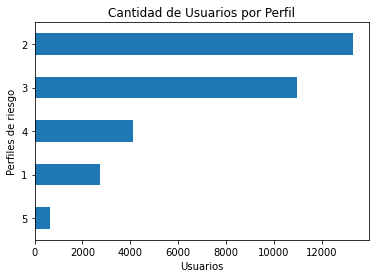

In [6]:
df1=df.groupby('Perfil Riesgo').cant.sum()
df1=df1.sort_values(ascending=True)
plt.figure()
df1.plot(kind="barh")
plt.title("Cantidad de Usuarios por Perfil")
plt.ylabel("Perfiles de riesgo")
plt.xlabel("Usuarios")
plt.show()

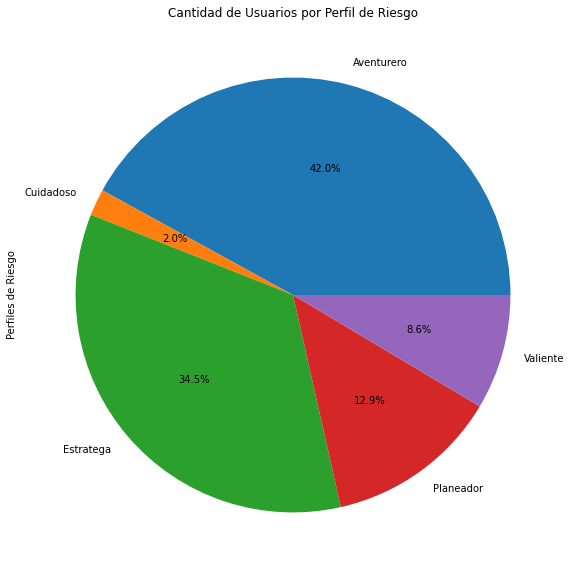

In [7]:
df1=df.groupby('Riesgo').cant.sum()
plt.figure()
df1.plot(kind="pie", figsize=(10, 10), autopct='%.1f%%')
plt.title("Cantidad de Usuarios por Perfil de Riesgo")
plt.ylabel("Perfiles de Riesgo")
plt.show()

In [7]:
df.describe()

,Id Modificado,Perfil Riesgo,Codigo CIIU,Cod_Ciudad_Nac.,Cod Dpto.Nacimto.,Cod. Ocupacion,Ingresos_mensuales,Egresos_mensuales,Otros_Ing_Mensuales,Total_Activos,Total_Pasivos,cant
count,31734.000000,31734.000000,31734.000000,31733.000000,31734.000000,31734.000000,3.173400e+04,3.173400e+04,3.173400e+04,3.173400e+04,3.173400e+04,31734.0
mean,15936.755404,2.577551,262.417754,29376.875272,27.820004,0.701235,4.231418e+06,3.801603e+06,1.015177e+05,2.284609e+07,7.133181e+06,1.0
std,9188.124201,0.890158,1253.606277,23209.148722,26.346628,1.012922,5.615783e+08,5.614388e+08,1.670029e+06,6.154807e+08,1.062389e+08,0.0
min,1.000000,1.000000,0.000000,5001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,7982.250000,2.000000,0.000000,11001.000000,11.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,15938.500000,2.000000,0.000000,25430.000000,11.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
75%,23890.750000,3.000000,10.000000,36386.000000,52.000000,2.000000,1.000000e+06,5.000000e+05,0.000000e+00,1.000000e+06,1.000000e+05,1.0
max,31854.000000,5.000000,9820.000000,229309.000000,99.000000,10.000000,1.000000e+11,1.000000e+11,2.580000e+08,1.000000e+11,1.740000e+10,1.0


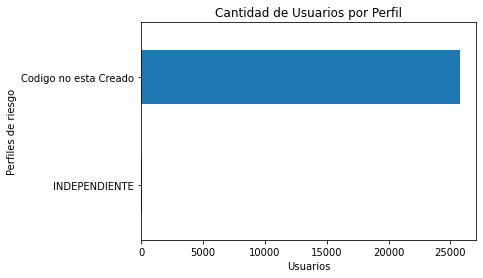

In [9]:
df1=df.groupby('CIIU').cant.sum()
df1=df1.sort_values(ascending=True)
plt.figure()
df1.plot(kind="barh")
plt.title("Cantidad de Usuarios por Perfil")
plt.ylabel("Perfiles de riesgo")
plt.xlabel("Usuarios")
plt.show()